In [20]:
import sys
sys.path.append('../../')

from IPython.core.display import display
import numpy as np
import pandas as pd
import networkx as nx
from sortedcontainers import SortedDict
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.ticker import PercentFormatter

In [2]:
# import node embeddings
df = pd.read_csv(
    "./facebook_alpha-0.1_beta-0.1_ws-10_neg-5_lr-0.025_icom-36_ind-36_k-10_ds-0.0.txt",
    sep="\t| ",
    header=None
)
df = df.rename(columns={0: 'node'})
df.set_index(['node'], inplace=True)

/Users/anton/miniconda3/envs/MT/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [3]:
# import train
train = pd.read_csv("./facebook_train.csv", index_col=0)
# import test
test = pd.read_csv("./facebook_test.csv", index_col=['u', 'v'])

In [4]:
# import predicted labels
labels = pd.read_csv("./labels_pred.txt", header=None)
labels = labels.rename(columns={0: 'label'})
labels.label = labels.astype(int)
labels

,label
0,0
1,5
2,0
3,5
4,6
...,...
3959,6
3960,6
3961,0
3962,6


In [5]:
df = df.join(labels)

In [6]:
# node embeddings
display(df.head())
display(df.describe())

# train df
display(train.head())
display(train.describe())

# test df
display(test.head())
display(test.describe())

,1,2,3,4,5,6,7,8,9,10,...,120,121,122,123,124,125,126,127,128,label
node,,,,,,,,,,,,,,,,,,,,,
0,1.410215,1.055887,0.276106,0.337015,-0.855183,-2.079889,0.359319,-1.668620,0.876247,-1.597333,...,-1.559046,-0.227659,0.615875,1.590270,-0.201614,-0.807248,0.872891,2.338391,0.422456,0.0
1,0.642537,0.210880,-0.079735,0.394628,-0.354652,-0.673384,-0.264542,-0.573317,0.387186,-0.928790,...,-0.942434,-0.044016,0.357568,0.653752,-0.403103,-0.440986,0.245575,0.464131,0.173977,5.0
2,0.364444,0.483713,0.041530,-0.253252,-0.341561,-0.855875,0.262481,-0.731090,0.282645,-0.468689,...,-0.349008,-0.063245,-0.019917,0.298720,0.008025,-0.167265,0.273740,0.909920,-0.209141,0.0
3,0.760110,0.369128,0.191771,0.325326,-0.209396,-0.604434,0.049080,-0.714295,0.193736,-0.875754,...,-0.954742,-0.068425,0.373606,0.926925,-0.254449,-0.417411,0.377861,0.640826,0.327309,5.0
4,0.486993,0.028743,0.081050,-0.222652,-0.348967,-0.806270,0.705609,-0.529239,0.516686,-0.425610,...,-0.495183,-0.013476,0.070995,0.500861,0.040166,0.071827,-0.117763,0.805720,-0.078896,6.0


,1,2,3,4,5,6,7,8,9,10,...,120,121,122,123,124,125,126,127,128,label
count,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,...,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3897.000000
mean,0.245962,0.234974,-0.118125,-0.069435,0.130555,-0.061437,0.135782,0.032777,-0.030051,0.159000,...,-0.055033,0.093342,0.198299,-0.009326,0.003912,-0.083582,0.338404,-0.135958,-0.183193,4.262510
std,0.285687,0.536587,0.349763,0.284315,0.373223,0.393623,0.279270,0.570081,0.695714,0.558243,...,0.555397,0.396318,0.625316,0.704484,0.415985,0.439189,0.330743,0.820394,0.626242,2.828992
min,-0.692461,-0.683688,-2.198696,-1.892806,-0.855183,-2.079889,-0.787928,-1.668620,-1.995587,-1.597333,...,-1.706021,-0.641542,-0.842246,-2.712219,-1.082921,-1.936546,-0.436558,-3.588310,-1.661151,0.000000
25%,0.045890,-0.118894,-0.274778,-0.250238,-0.115985,-0.191114,-0.023315,-0.245293,-0.274042,-0.058783,...,-0.276742,-0.104644,-0.125527,-0.058614,-0.209601,-0.204926,0.128835,-0.166092,-0.516550,2.000000
50%,0.216832,0.047774,-0.047532,-0.041141,0.087722,-0.021151,0.123140,0.022771,-0.021171,0.086926,...,-0.050763,0.030199,0.071797,0.098033,-0.045417,0.018314,0.277037,0.001256,-0.290211,4.000000
75%,0.364162,0.408460,0.114134,0.123863,0.323650,0.151224,0.264197,0.197018,0.114206,0.230962,...,0.143825,0.202780,0.274561,0.329461,0.191753,0.175263,0.440702,0.196135,-0.043263,7.000000
max,1.410215,2.177685,0.673434,0.971740,1.719087,1.372390,1.184074,2.493209,2.639332,2.432325,...,3.097754,3.346251,2.757494,1.590270,2.287718,0.639313,1.988750,2.338391,2.369749,9.000000


,u,v
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


,u,v
count,86999.000000,86999.000000
mean,1865.069449,2154.507420
std,910.682085,894.143924
min,0.000000,1.000000
25%,1160.000000,1601.000000
50%,1983.000000,2259.000000
75%,2423.000000,2631.000000
max,4031.000000,4038.000000


,,Unnamed: 0
u,v,
0,276,0
9,21,1
21,281,2
25,141,3
26,9,4


,Unnamed: 0
count,1169.000000
mean,584.000000
std,337.605539
min,0.000000
25%,292.000000
50%,584.000000
75%,876.000000
max,1168.000000


In [7]:
def emb_from_row(row):
    """get node embedding np array from df row"""
    return row.drop('label').to_numpy().flatten()

def emb_distance(emb1, emb2):
    """computes the euclidean distance between two node embeddings"""
    return np.linalg.norm(emb1-emb2)

In [8]:
# get nx train graph
G_train = nx.from_pandas_edgelist(train, "u", "v")

In [16]:
# compute Top-N lists for test dataset
# for each testing row
results = {}
results_com = {}
i = 0
for index, _ in test.iterrows():
    userId = index[0]
    if not userId in df.index: continue
    user_emb = emb_from_row(df.loc[userId])
    user_label = df.loc[userId].label

    # get user's non_friends in user's community
    # users_in_community
    users_in_community = df[df.label == user_label]
    #print("len(users_in_community): ", len(users_in_community))
    # friends
    friends = list(G_train[userId])
    #print("len(friends): ", len(friends))
    # not_friends
    not_friends = df[~df.index.isin(friends+[userId])]
    #print("len(not_friends): ", len(not_friends))
    # not_friends_in_community
    not_friends_in_community = users_in_community[~users_in_community.index.isin(friends+[userId])]
    #print("len(not_friends_in_community): ", len(not_friends_in_community))

    # generate user's top_list from all not_friends
    distances = {}
    top_list = SortedDict()
    for movie_id, node_row in not_friends.iterrows():
        node_emb = emb_from_row(node_row)
        dist = emb_distance(user_emb, node_emb)
        top_list[dist] = movie_id
        distances[movie_id] = dist
    results[userId] = top_list, distances

    # generate user's top_list from all not_friends_in_community
    distances_com = {}
    top_list_com = SortedDict()
    for movie_id, node_row in not_friends_in_community.iterrows():
        node_emb = emb_from_row(node_row)
        dist = emb_distance(user_emb, node_emb)
        top_list_com[dist] = movie_id
        distances_com[movie_id] = dist
    results_com[userId] = top_list_com, distances_com

    if i % 10 == 0:
        print(f"{i}/{len(test)}")
    i += 1

0/1169
10/1169
20/1169
30/1169
40/1169
50/1169
60/1169
70/1169
80/1169
90/1169
100/1169
110/1169
120/1169
130/1169
140/1169
150/1169
160/1169
170/1169
180/1169
190/1169
200/1169
210/1169
220/1169
230/1169
240/1169
250/1169
260/1169
270/1169
280/1169
290/1169
300/1169
310/1169
320/1169
330/1169
340/1169
350/1169
360/1169
370/1169
380/1169
390/1169
400/1169
410/1169
420/1169
430/1169
440/1169
450/1169
460/1169
470/1169
480/1169
490/1169
500/1169
510/1169
520/1169
530/1169
540/1169
550/1169
560/1169
570/1169
580/1169
590/1169
600/1169
610/1169
620/1169
630/1169
640/1169
650/1169
660/1169
670/1169
680/1169
690/1169
700/1169
710/1169
720/1169
730/1169
740/1169
750/1169
760/1169
770/1169
780/1169
790/1169
800/1169
810/1169
820/1169
830/1169
840/1169
850/1169
860/1169
870/1169
880/1169
890/1169
900/1169
910/1169
920/1169
930/1169
940/1169
950/1169
960/1169
970/1169
980/1169
990/1169
1000/1169
1010/1169
1020/1169
1030/1169
1040/1169
1050/1169
1060/1169
1070/1169
1080/1169
1090/1169
1100/1169
1

In [18]:
Ns = []
hit_rates = []
hit_rates_com = []

for N in range(1, 101):

    # counters
    hits = 0
    misses = 0
    hits_com = 0
    misses_com = 0

    for userId in results.keys():
        top_list, _ = results[userId]
        top_list_com, _ = results_com[userId]
        # get Top-N friend suggestions
        top_N = top_list.values()[:N]
        top_N_com = top_list_com.values()[:N]
        # get user's test friend
        test_friend = test.query(f"u == {userId}").index.get_level_values('v')[0]
        # evaluate
        hit = test_friend in top_N
        if hit:
            hits += 1
        else:
            misses += 1
        hit_com = test_friend in top_N_com
        if hit_com:
            hits_com += 1
        else:
            misses_com += 1

        #print(f"Friend suggestion {test_friend} {'found' if hit else 'not found'} in user {userId}'s Top-{N} list: ", top_N)

    hit_rate = hits / (hits+misses)
    hit_rate_com = hits_com / (hits_com+misses_com)
    print(f"{N}: {hits}/{hits+misses} = {hit_rate}")
    print(f"{N}: {hits_com}/{hits_com+misses_com} = {hit_rate_com} (com)")

    Ns.append(N)
    hit_rates.append(hit_rate)
    hit_rates_com.append(hit_rate_com)

1: 118/1169 = 0.1009409751924722
1: 69/1169 = 0.05902480752780154 (com)
2: 205/1169 = 0.17536355859709152
2: 99/1169 = 0.08468776732249786 (com)
3: 274/1169 = 0.23438836612489308
3: 112/1169 = 0.09580838323353294 (com)
4: 322/1169 = 0.2754491017964072
4: 127/1169 = 0.1086398631308811 (com)
5: 351/1169 = 0.30025662959794697
5: 136/1169 = 0.11633875106929 (com)
6: 382/1169 = 0.32677502138579984
6: 142/1169 = 0.12147134302822926 (com)
7: 417/1169 = 0.3567151411462789
7: 154/1169 = 0.1317365269461078 (com)
8: 448/1169 = 0.38323353293413176
8: 160/1169 = 0.13686911890504705 (com)
9: 478/1169 = 0.40889649272882805
9: 164/1169 = 0.14029084687767324 (com)
10: 503/1169 = 0.43028229255774164
10: 173/1169 = 0.14798973481608213 (com)
11: 527/1169 = 0.4508126603934987
11: 175/1169 = 0.1497005988023952 (com)
12: 554/1169 = 0.4739093242087254
12: 182/1169 = 0.15568862275449102 (com)
13: 583/1169 = 0.49871685201026517
13: 189/1169 = 0.16167664670658682 (com)
14: 599/1169 = 0.5124037639007699
14: 193/1

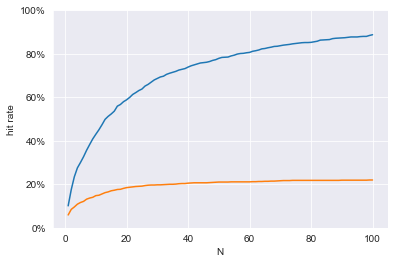

In [27]:
hit_rate_df = pd.DataFrame(columns=Ns)

sns.set_style("darkgrid")

ax = sns.lineplot(x=Ns, y=hit_rates)
plt.plot(Ns, hit_rates_com)
ax.set(xlabel='N', ylabel='hit rate', ylim=(0, 1))
ax.yaxis.set_major_formatter(PercentFormatter(1))

fig = ax.get_figure()
fig.savefig("./hit_rates.png")